# Behavior Analysis: % Total Frames Per Behavior

Press SHIFT + ENTER to run code

### USER INPUT!

In [1]:
## Define project
project_name = 'project_ACC_MiniscopeSNI_3WeekMorphine'

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['NoInjury','SNI']
selected_conditions = ['Combined']


### Main Code: Create Pie Graph of Total Frames Per Behavior

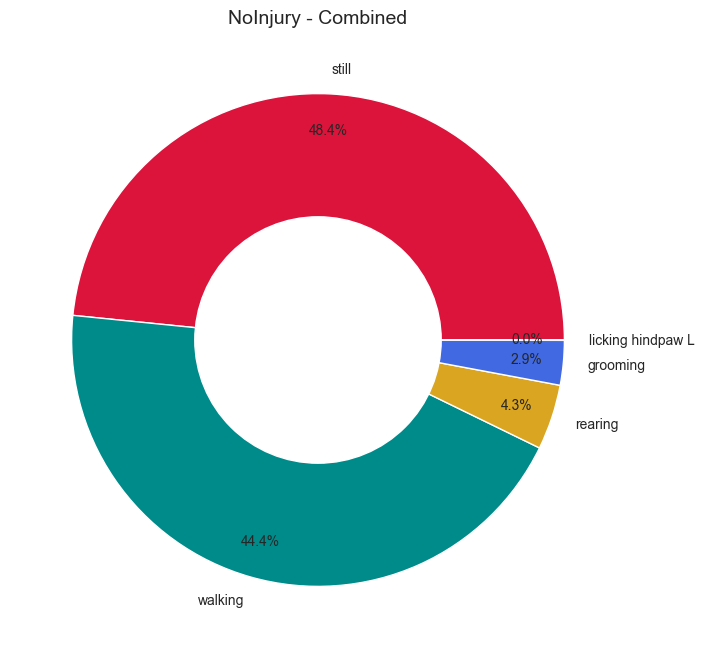

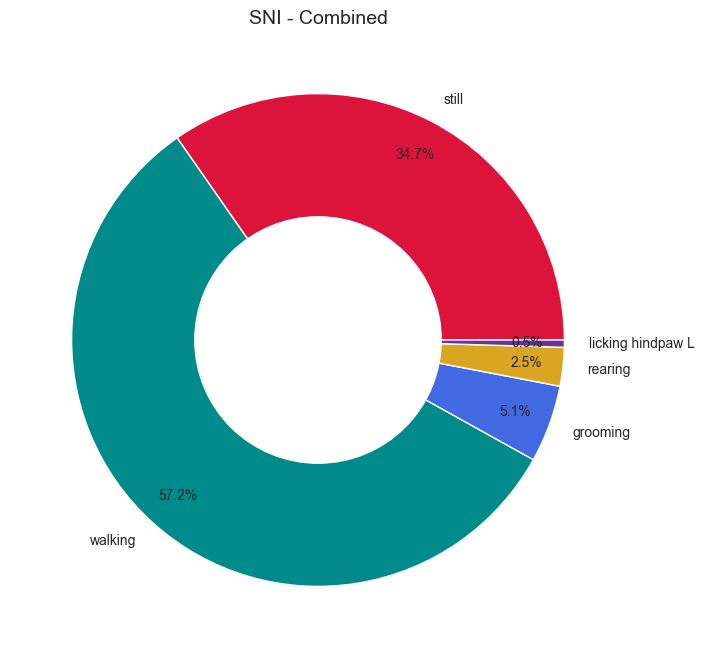

In [2]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

###### Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")

# Define the directory path
directory_path = f"../processed_dataset/{project_name}/figures/behavior_total-frames"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Iterate over selected groups and conditions
for selected_condition in selected_conditions:
    for selected_group in selected_groups:
        if selected_group in behaviors and selected_condition in behaviors[selected_group]:
            file_keys = list(behaviors[selected_group][selected_condition].keys())
            
            # Prepare data for pie chart
            predict_dict = {
                'condition': np.repeat(
                    selected_condition,
                    len(np.hstack([behaviors[selected_group][selected_condition][file_name] for file_name in file_keys]))
                ),
                'behavior': np.hstack([behaviors[selected_group][selected_condition][file_name] for file_name in file_keys])
            }
            df_raw = pd.DataFrame(data=predict_dict)
            labels = df_raw['behavior'].value_counts(sort=False).index
            values = df_raw['behavior'].value_counts(sort=False).values
            
            # Create summary DataFrame
            df = pd.DataFrame()
            behavior_labels = [behavior_names[int(l)] for l in labels]
            df["values"] = values
            df['labels'] = behavior_labels
            df["colors"] = df["labels"].apply(
                lambda x: behavior_colors[behavior_names.index(x)]
            )  # Connect behavior labels to colors
            
            # Save summary data to CSV
            csv_filename = f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total_frames_{project_name}_{selected_group}-{selected_condition}.csv"
            df.to_csv(csv_filename)

            # Create pie chart
            fig, ax = plt.subplots(figsize=(8, 8))
            wedges, texts, autotexts = ax.pie(
                df['values'],
                colors=df['colors'],
                labels=df['labels'],
                autopct='%1.1f%%',
                pctdistance=0.85,
                textprops={'fontsize': 10}
            )
            
            # Add a circle for a donut-style chart
            centre_circle = plt.Circle((0, 0), 0.50, fc='white')
            ax.add_artist(centre_circle)
            
            # Set title and layout
            ax.set_title(f'{selected_group} - {selected_condition}', fontsize=14)
            
            # Save the figure
            fig_filename = f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total_frames_{project_name}_{selected_group}_{selected_condition}.svg"
            fig.savefig(fig_filename, dpi=600, bbox_inches='tight')
            plt.show()
        else:
            print(f"No data found for {selected_group} under condition {selected_condition}")

# ANALYSIS COMPLETE!